In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Online Retail.csv',encoding= 'unicode_escape')

In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
24716,538349,22845,VINTAGE CREAM CAT FOOD CONTAINER,1,10-12-2010 14:59,12.72,NaN,United Kingdom
24717,538349,22851,SET 20 NAPKINS FAIRY CAKES DESIGN,2,10-12-2010 14:59,1.66,NaN,United Kingdom
24718,538349,22855,FINE WICKER HEART,1,10-12-2010 14:59,1.24,NaN,United Kingdom
24719,538349,22855,FINE WICKER HEART,2,10-12-2010 14:59,2.51,NaN,United Kingdom


In [ ]:
data['InvoiceNo'] = data['InvoiceNo'].str.extract('(\d+)').astype(int)

In [ ]:
# data['StockCode']=data['StockCode'].str.extract('(\d+)').astype(int)

checking how many null values are there in the dataset



In [ ]:
data.isnull().sum()

InvoiceNo         0
StockCode         0
Description     111
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     8691
Country           0
dtype: int64

dropping all the null values

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

checking the information of the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16030 entries, 0 to 24289
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    16030 non-null  int64  
 1   StockCode    16030 non-null  object 
 2   Description  16030 non-null  object 
 3   Quantity     16030 non-null  int64  
 4   InvoiceDate  16030 non-null  object 
 5   UnitPrice    16030 non-null  float64
 6   CustomerID   16030 non-null  float64
 7   Country      16030 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 1.1+ MB


dropping the columns that are not required for the clustering

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
data1 = data.drop(['InvoiceDate','StockCode','Description'],axis='columns')
data1

,InvoiceNo,Quantity,UnitPrice,CustomerID,Country
0,536365,6,2.55,17850.0,United Kingdom
1,536365,6,3.39,17850.0,United Kingdom
2,536365,8,2.75,17850.0,United Kingdom
3,536365,6,3.39,17850.0,United Kingdom
4,536365,6,3.39,17850.0,United Kingdom
...,...,...,...,...,...
24285,538347,3,7.95,17220.0,United Kingdom
24286,538347,2,1.25,17220.0,United Kingdom
24287,538347,3,4.25,17220.0,United Kingdom
24288,538347,4,1.45,17220.0,United Kingdom


In [ ]:
data1.shape

(16030, 5)

In [ ]:
data1['Country'].nunique()

18

In [ ]:
data1['InvoiceNo'].nunique()

968

In [ ]:
data1

,InvoiceNo,Quantity,UnitPrice,CustomerID,Country
0,536365,6,2.55,17850.0,United Kingdom
1,536365,6,3.39,17850.0,United Kingdom
2,536365,8,2.75,17850.0,United Kingdom
3,536365,6,3.39,17850.0,United Kingdom
4,536365,6,3.39,17850.0,United Kingdom
...,...,...,...,...,...
24285,538347,3,7.95,17220.0,United Kingdom
24286,538347,2,1.25,17220.0,United Kingdom
24287,538347,3,4.25,17220.0,United Kingdom
24288,538347,4,1.45,17220.0,United Kingdom


In [ ]:
dummy = pd.get_dummies(data1.Country)

In [ ]:
dummy

,Australia,Belgium,Channel Islands,Denmark,EIRE,France,Germany,Iceland,Italy,Japan,Lithuania,Netherlands,Norway,Poland,Portugal,Spain,Switzerland,United Kingdom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24285,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
24286,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
24287,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
24288,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
data2 = pd.concat([data1,dummy],axis='columns')

In [ ]:
data2

,InvoiceNo,Quantity,UnitPrice,CustomerID,Country,Australia,Belgium,Channel Islands,Denmark,EIRE,...,Italy,Japan,Lithuania,Netherlands,Norway,Poland,Portugal,Spain,Switzerland,United Kingdom
0,536365,6,2.55,17850.0,United Kingdom,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,536365,6,3.39,17850.0,United Kingdom,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,536365,8,2.75,17850.0,United Kingdom,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,536365,6,3.39,17850.0,United Kingdom,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,536365,6,3.39,17850.0,United Kingdom,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24285,538347,3,7.95,17220.0,United Kingdom,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24286,538347,2,1.25,17220.0,United Kingdom,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24287,538347,3,4.25,17220.0,United Kingdom,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24288,538347,4,1.45,17220.0,United Kingdom,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data2 = data2.drop('Country',axis='columns')

In [ ]:
data2

,InvoiceNo,Quantity,UnitPrice,CustomerID,Australia,Belgium,Channel Islands,Denmark,EIRE,France,...,Italy,Japan,Lithuania,Netherlands,Norway,Poland,Portugal,Spain,Switzerland,United Kingdom
0,536365,6,2.55,17850.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,536365,6,3.39,17850.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,536365,8,2.75,17850.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,536365,6,3.39,17850.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,536365,6,3.39,17850.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24285,538347,3,7.95,17220.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24286,538347,2,1.25,17220.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24287,538347,3,4.25,17220.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24288,538347,4,1.45,17220.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16030 entries, 0 to 24289
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   InvoiceNo        16030 non-null  int64  
 1   Quantity         16030 non-null  int64  
 2   UnitPrice        16030 non-null  float64
 3   CustomerID       16030 non-null  float64
 4   Australia        16030 non-null  uint8  
 5   Belgium          16030 non-null  uint8  
 6   Channel Islands  16030 non-null  uint8  
 7   Denmark          16030 non-null  uint8  
 8   EIRE             16030 non-null  uint8  
 9   France           16030 non-null  uint8  
 10  Germany          16030 non-null  uint8  
 11  Iceland          16030 non-null  uint8  
 12  Italy            16030 non-null  uint8  
 13  Japan            16030 non-null  uint8  
 14  Lithuania        16030 non-null  uint8  
 15  Netherlands      16030 non-null  uint8  
 16  Norway           16030 non-null  uint8  
 17  Poland      

In [ ]:
from sklearn.cluster import KMeans
     

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data2,test_size = 0.05, random_state = 0)

In [ ]:
X_train.shape

(15228, 22)

In [ ]:
from sklearn import metrics
from scipy.spatial.distance import cdist

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
X = X_train
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1668.6552252093463
2 : 993.393062480777
3 : 716.6025151717009
4 : 631.3642860735952
5 : 559.3413994906156
6 : 513.7289002072775
7 : 478.6050812842488
8 : 432.99220960863005
9 : 401.90992123330255


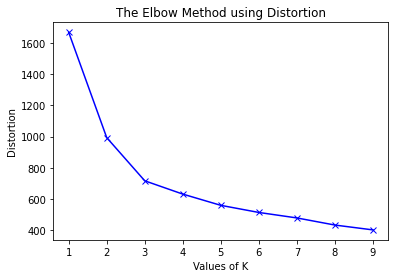

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 53144786618.44757
2 : 17250175253.881577
3 : 9179226783.175133
4 : 7184956765.780914
5 : 5904056068.62467
6 : 4944529561.902311
7 : 4235047847.051695
8 : 3583653285.3721175
9 : 3026509995.204526


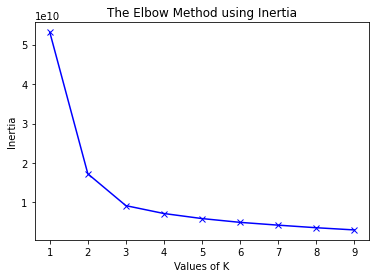

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()
     

In [ ]:
algorithm = KMeans(n_clusters=3)
algorithm.fit(X_train)

KMeans(n_clusters=3)

In [ ]:
algorithm.labels_

array([0, 0, 2, ..., 0, 0, 2], dtype=int32)

In [ ]:
algorithm.cluster_centers_
     

array([[ 5.37318482e+05,  9.72003500e+00,  3.07720560e+00,
         1.74760940e+04,  8.15320034e-17,  2.90566182e-17,
         2.84060969e-17,  5.81132364e-17, -2.89698820e-16,
         1.22818422e-15,  8.77770079e-16, -9.54097912e-17,
        -5.85469173e-17, -3.96817995e-17,  8.19656842e-17,
         3.55076211e-18, -3.03576608e-16,  1.42030485e-17,
        -4.25007252e-17,  6.82414698e-03,  3.03576608e-17,
         9.93175853e-01],
       [ 5.37384118e+05,  1.25500883e+01,  3.33682311e+00,
         1.31648895e+04,  5.55134999e-03,  2.27100681e-03,
        -2.40692882e-17,  4.54201363e-03,  1.00933636e-03,
         6.96442089e-02,  7.54478930e-02,  7.57002271e-03,
         6.30835226e-03,  4.28967954e-03,  7.41594286e-17,
         5.04668181e-04,  3.45697704e-02,  2.01867272e-03,
         2.32147363e-02,  1.26167045e-03,  1.51400454e-03,
         7.60282614e-01],
       [ 5.37285810e+05,  8.05135135e+00,  3.14925586e+00,
         1.53548650e+04,  8.93382590e-17,  2.74303150e-17,
    

In [ ]:
algorithm.n_iter_

7

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
data_2 = pca.fit_transform(X_train)
data_2

array([[-2284.68569333,  -115.88188099],
       [-2353.18484845,   828.64823064],
       [  913.32792018,   261.48481202],
       ...,
       [-2471.09260111,   170.82240866],
       [-2003.27385576,   361.69735841],
       [   25.41698508,  -592.26928301]])

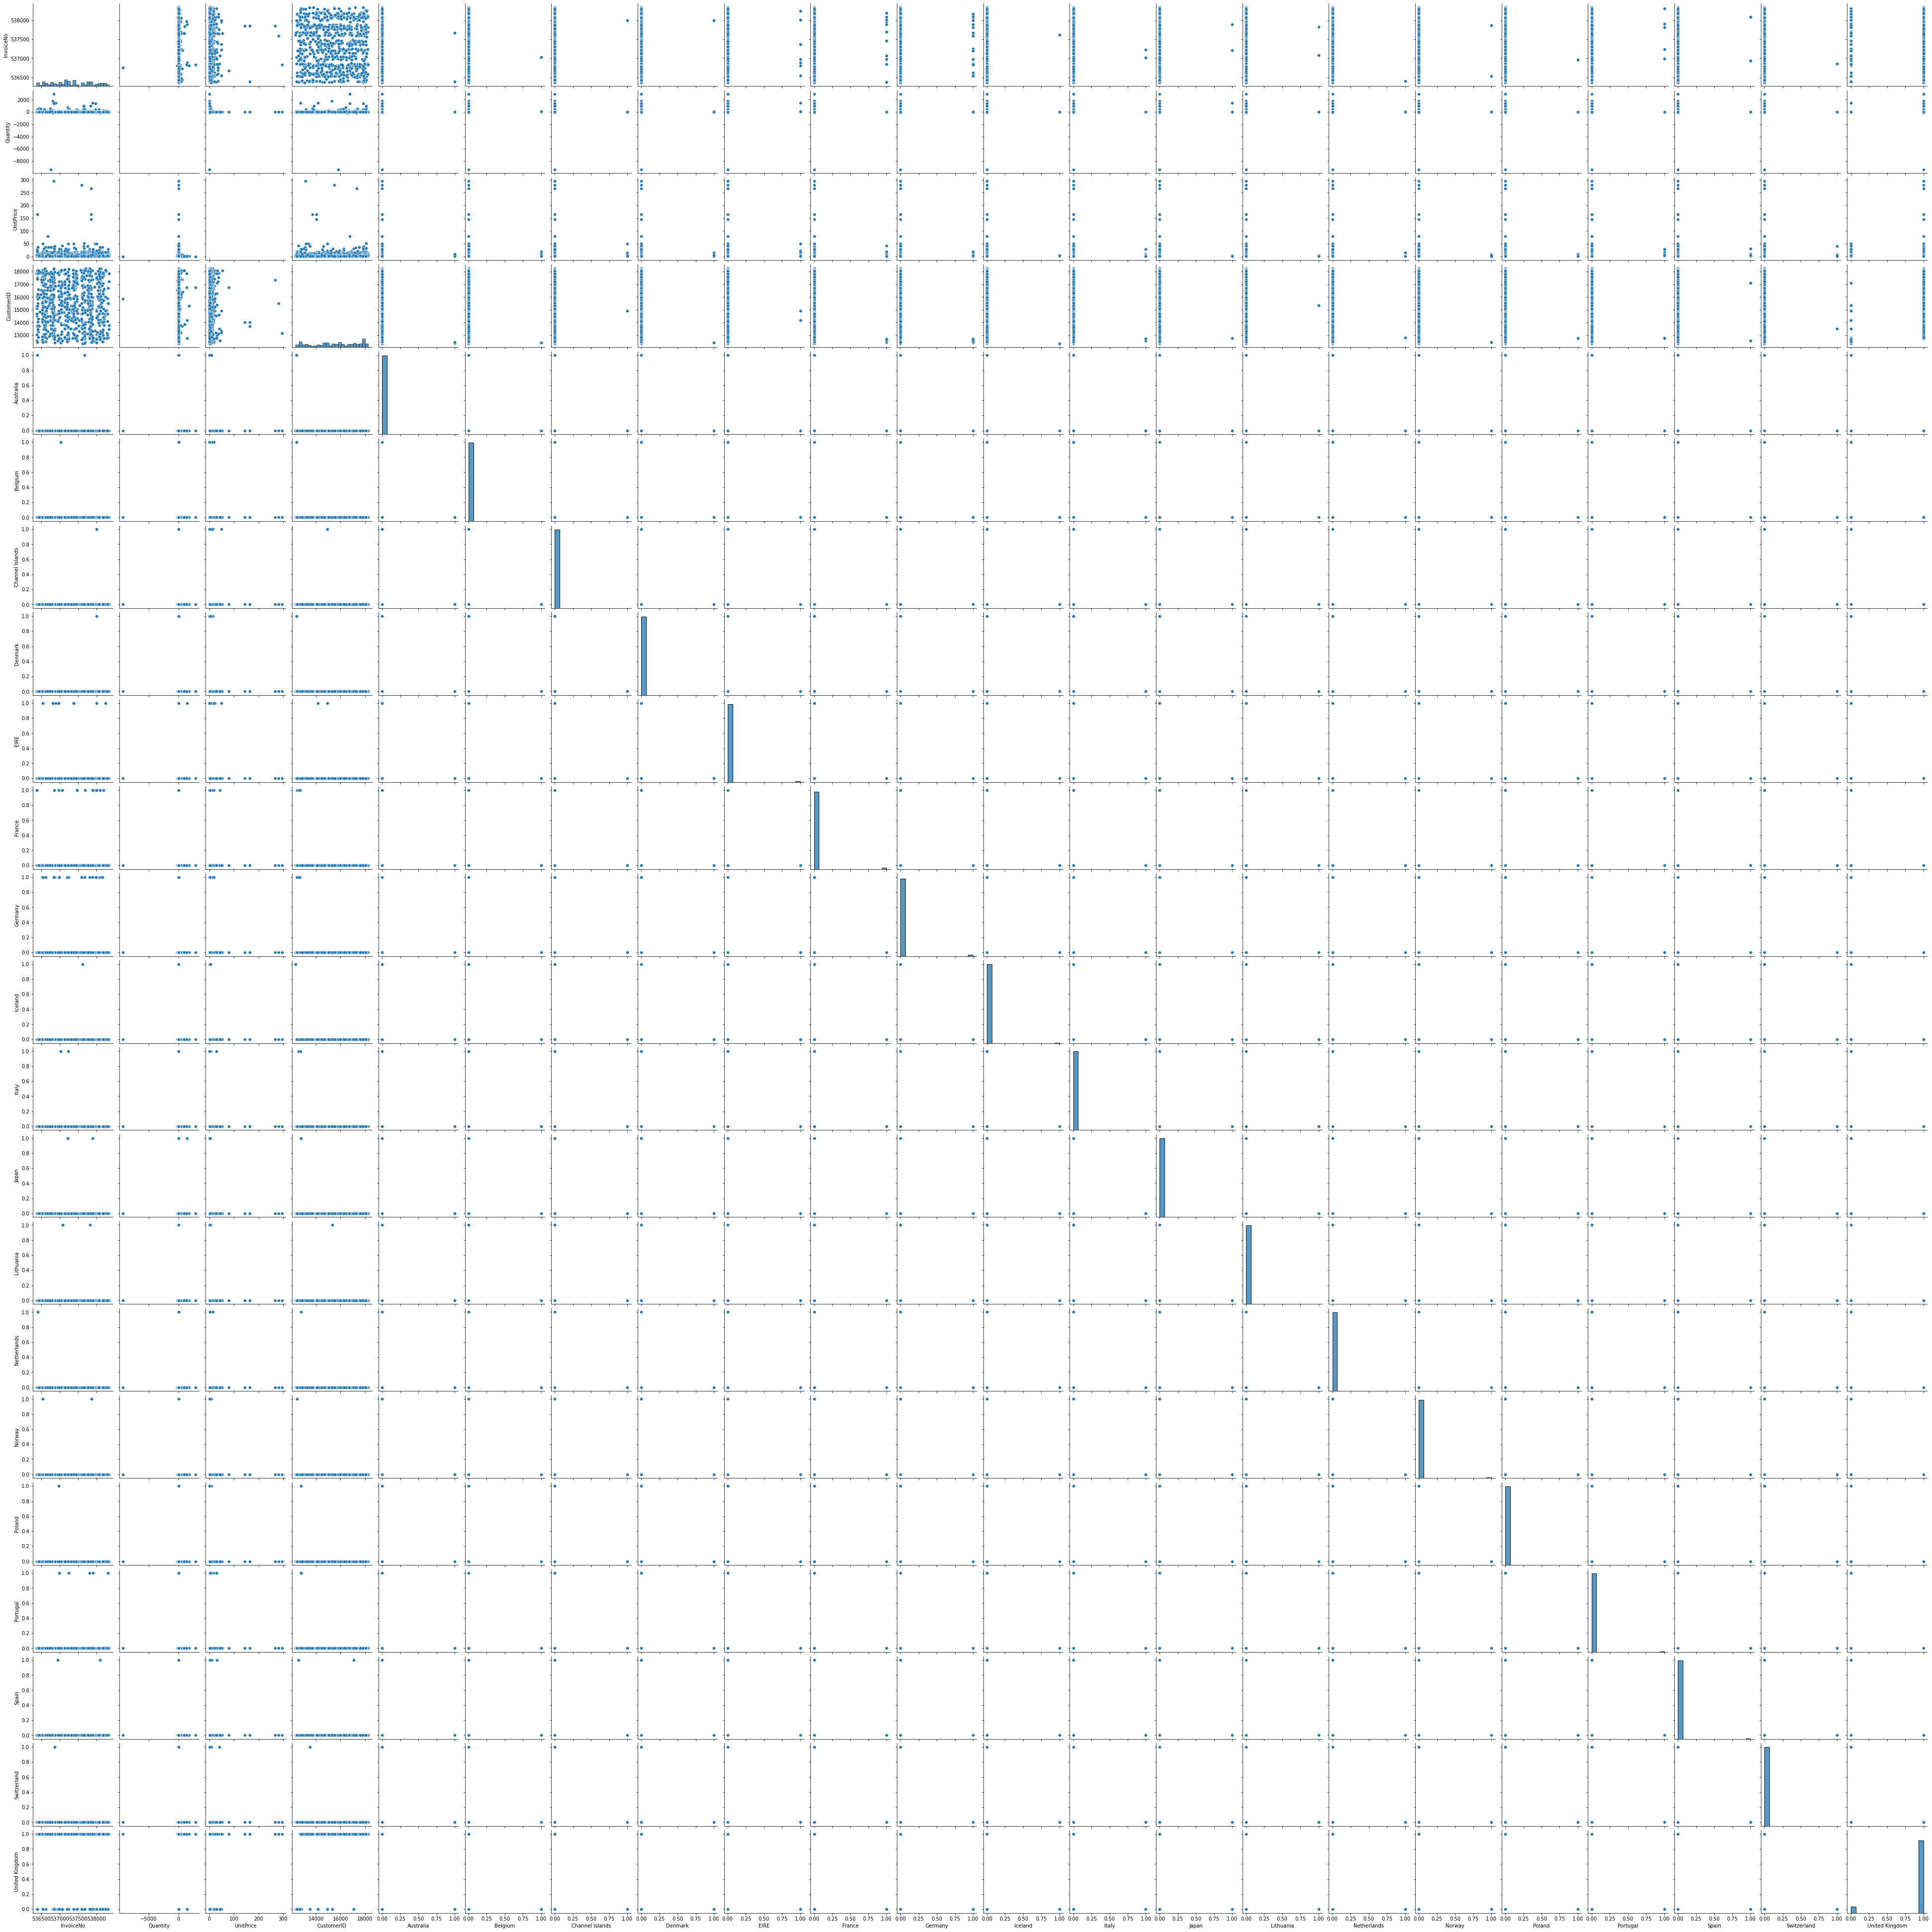

In [ ]:
import seaborn as sns
sns.pairplot(X_train)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


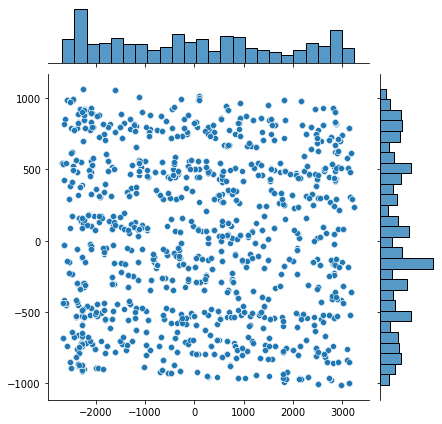

In [ ]:
sns.jointplot(data_2[:,0],data_2[:,1])

In [ ]:
pca.components_

array([[ 1.96080093e-02,  5.93785775e-04,  4.30430780e-05,
        -9.99807565e-01,  1.43557934e-06,  5.91554068e-07,
         2.19022251e-07,  1.17758466e-06,  2.92678560e-06,
         1.68334989e-05,  1.85841949e-05,  2.00889482e-06,
         1.47560325e-06,  9.89858540e-07,  1.77022041e-07,
         1.14582689e-07,  8.90708128e-06,  4.62153634e-07,
         5.34658787e-06, -8.98025458e-07,  2.54450864e-07,
        -6.06064293e-05],
       [ 9.99807628e-01, -4.92782263e-04,  3.45473004e-05,
         1.96077206e-02, -2.50237551e-06, -6.97273530e-07,
         2.29097225e-06,  2.39110623e-06,  5.59043921e-06,
         6.17659481e-06,  4.69159502e-07,  1.54186976e-06,
        -1.87890783e-06, -4.42188660e-07, -1.69276430e-06,
        -4.19646397e-07, -5.32024862e-06, -7.01473369e-07,
         8.34358543e-06,  6.24851902e-06, -6.53197898e-07,
        -1.87441701e-05]])

In [ ]:
pca.explained_variance_ratio_

array([0.91024573, 0.08745431])

In [ ]:
X_train

,InvoiceNo,Quantity,UnitPrice,CustomerID,Australia,Belgium,Channel Islands,Denmark,EIRE,France,...,Italy,Japan,Lithuania,Netherlands,Norway,Poland,Portugal,Spain,Switzerland,United Kingdom
9020,537163,12,1.95,17863.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21670,538106,1,8.50,17950.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14548,537603,12,0.95,14673.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14019,537441,2,12.75,13564.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4179,536750,8,4.25,17850.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19774,537889,2,6.75,13319.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4455,536783,120,0.42,15061.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14040,537446,24,0.85,18055.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16264,537646,1,2.95,17591.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pc=pca.fit_transform(X_train)

pdf=pd.DataFrame(data=pc,columns=['principal component 1','principal component 2'])
target=pd.DataFrame(algorithm.labels_,columns=['target'])
X_=pd.concat([pdf,target],axis=1)
X_.head()
     

,principal component 1,principal component 2,target
0,-2284.685693,-115.881881,0
1,-2353.184848,828.648231,0
2,913.327920,261.484812,2
3,2018.932582,77.776350,1
4,-2279.788579,-529.055281,0


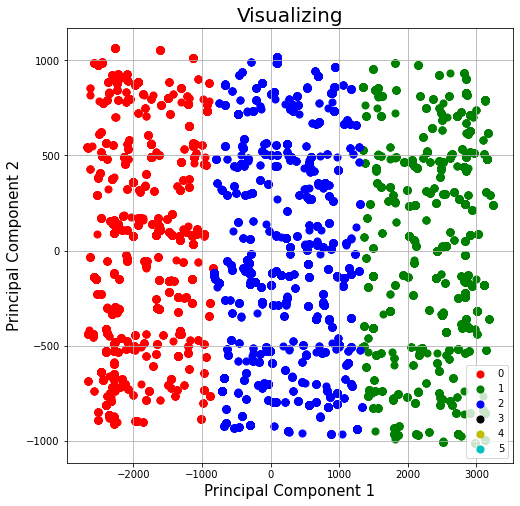

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Visualizing', fontsize = 20)
targets = [0,1,2,3,4,5]
colors = ['r', 'g','b','k','y','c']
for target, color in zip(targets,colors):
    indicesToKeep = X_['target'] == target
    ax.scatter(X_.loc[indicesToKeep,'principal component 1']
               , X_.loc[indicesToKeep,'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
y_pred = algorithm.predict(X_test)
print("Input data\n",X_test)
print("Predicted cluster\n",y_pred)

Input data
        InvoiceNo  Quantity  UnitPrice  CustomerID  Australia  Belgium  \
3245      536613        24       0.42     17855.0          0        0   
7454      537041         2       3.75     16033.0          0        0   
17451     537762         3       5.45     16558.0          0        0   
21602     538095         1       1.45     17097.0          0        0   
21744     538117        12       2.10     13327.0          0        0   
...          ...       ...        ...         ...        ...      ...   
18017     537793       100       1.65     15032.0          0        0   
4168      536750         6       1.06     17850.0          0        0   
17407     537758        16       0.42     16122.0          0        0   
13227     537428        24       0.65     17320.0          0        0   
11742     537265         6       0.85     15919.0          0        0   

       Channel Islands  Denmark  EIRE  France  ...  Italy  Japan  Lithuania  \
3245                 0        0 